In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


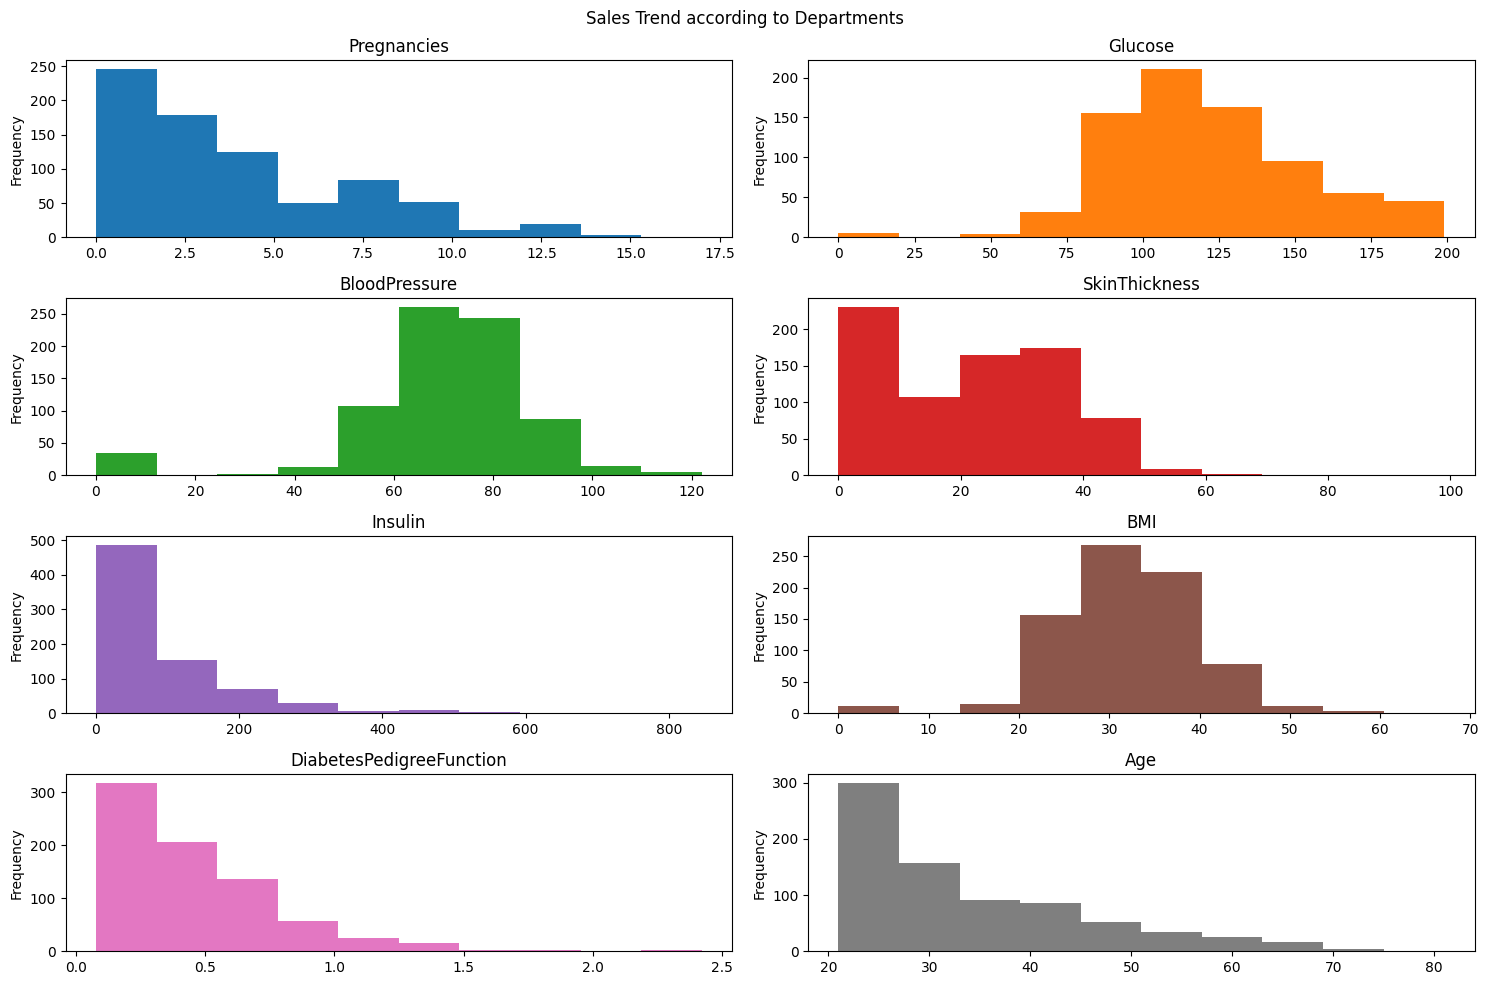

In [3]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Departments')
plt.tight_layout()
plt.show()



In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
#Replace the null values with the median of that column

df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

c:\Users\Gourab Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Gourab Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Gourab Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Gourab Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Gourab Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [7]:
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

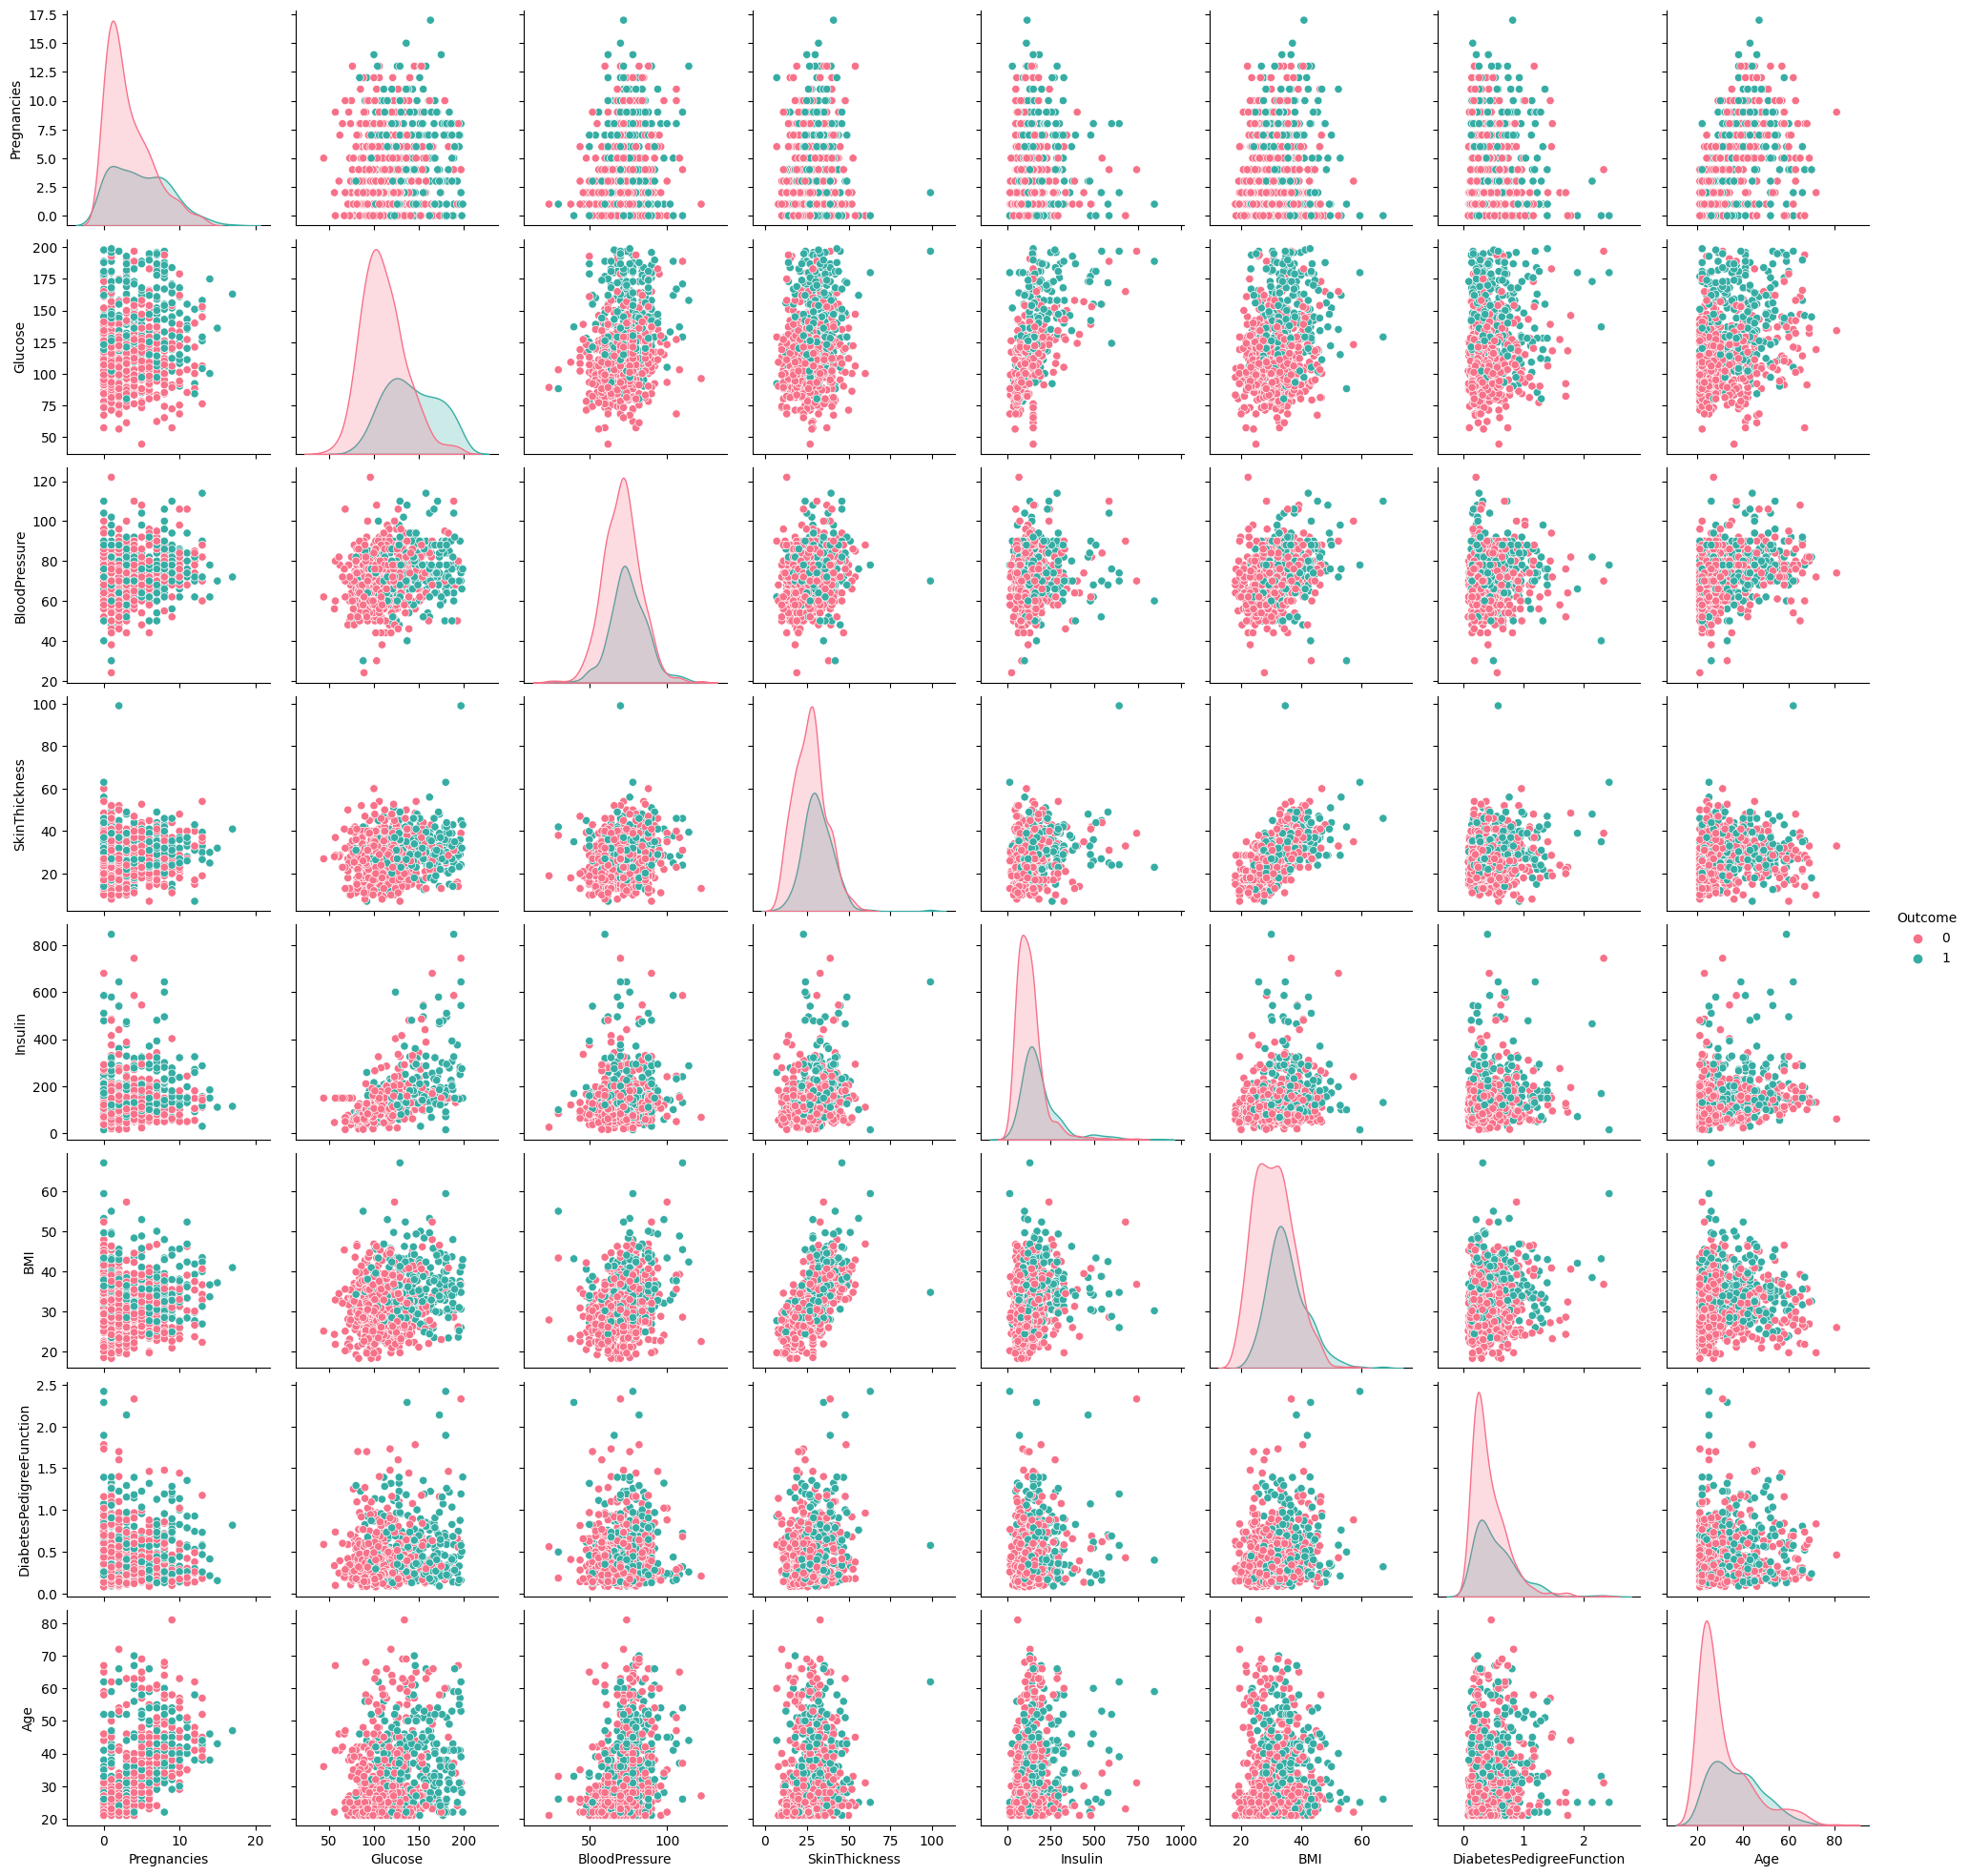

In [8]:
sns.pairplot(df, hue="Outcome",palette="husl")

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
len(x_train) # 614
len(x_test)  # 154

154

In [12]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6, max_features='log2')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='log2')

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(ccp_alpha=0.01, criterion='log_loss', max_depth=7, max_features='log2')
rf.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.01, criterion='log_loss', max_depth=7,
                       max_features='log2')

In [63]:
rf.score(x_test,y_test)

0.7922077922077922

In [15]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators':[100, 200, 300],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_features': ['sqrt', 'log2'],
#     'ccp_alpha': [0.1, .01, .001],
#     'max_depth' : [5, 6, 7, 8, 9],
#     }
# grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit=True, cv=5, verbose=3)
# grid.fit(x_train, y_train)
# print(grid.best_params_)
# print(grid.best_estimator_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.667 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.667 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.659 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.659 total time=   0.1s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.664 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.667 total time=   0.2s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.667 total time=   0.2s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=

In [16]:
dt.score(x_test,y_test)

0.6948051948051948

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
# clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf = GradientBoostingClassifier(max_depth=3)
clf.fit(x_train, y_train)
# clf.predict([[0, 0, 0, 0, 0, 0, 0, 0]])
clf.score(x_test, y_test)

0.7597402597402597

In [18]:
# model.predict([[6,148,72,35,0,33.6,0.627,50]])
# model.predict([[12,120,50,55,134,26.0,0.98,22]])
dt.predict([[5,121,72,23,112,26.2,0.245,30]])

array([0], dtype=int64)